# Task-3         
## Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.isna().sum() # checking null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Dataset Details:  

- **Timestamp (Time)** → The time when the transaction was recorded (in seconds).  
- **Features (V1 - V28)** → These are hidden variables transformed using PCA. Their exact meanings are unknown, but they contain important patterns related to fraud detection.  
- **Transaction Amount (Amount)** → The monetary value of the transaction (in €).  
- **Target Variable (Class)** →  
  - **0**: Normal transaction  
  - **1**: Fraudulent transaction (Fraud)  


In [9]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


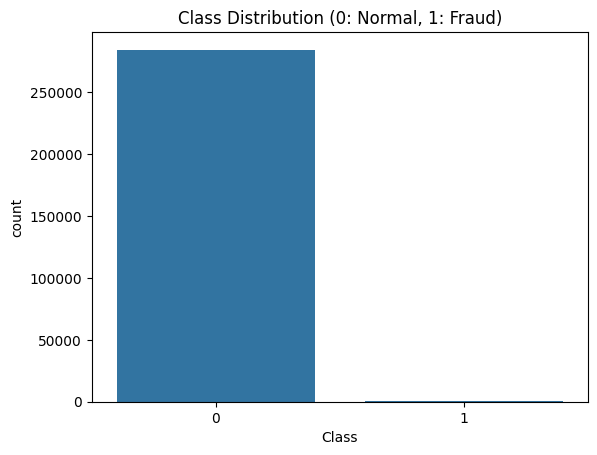

In [10]:
# Countplot for class distribution
sns.countplot(x=df["Class"])
plt.title("Class Distribution (0: Normal, 1: Fraud)")
plt.show()

We can see that Normal Transactions is much higher than Fraudulent Transactions.

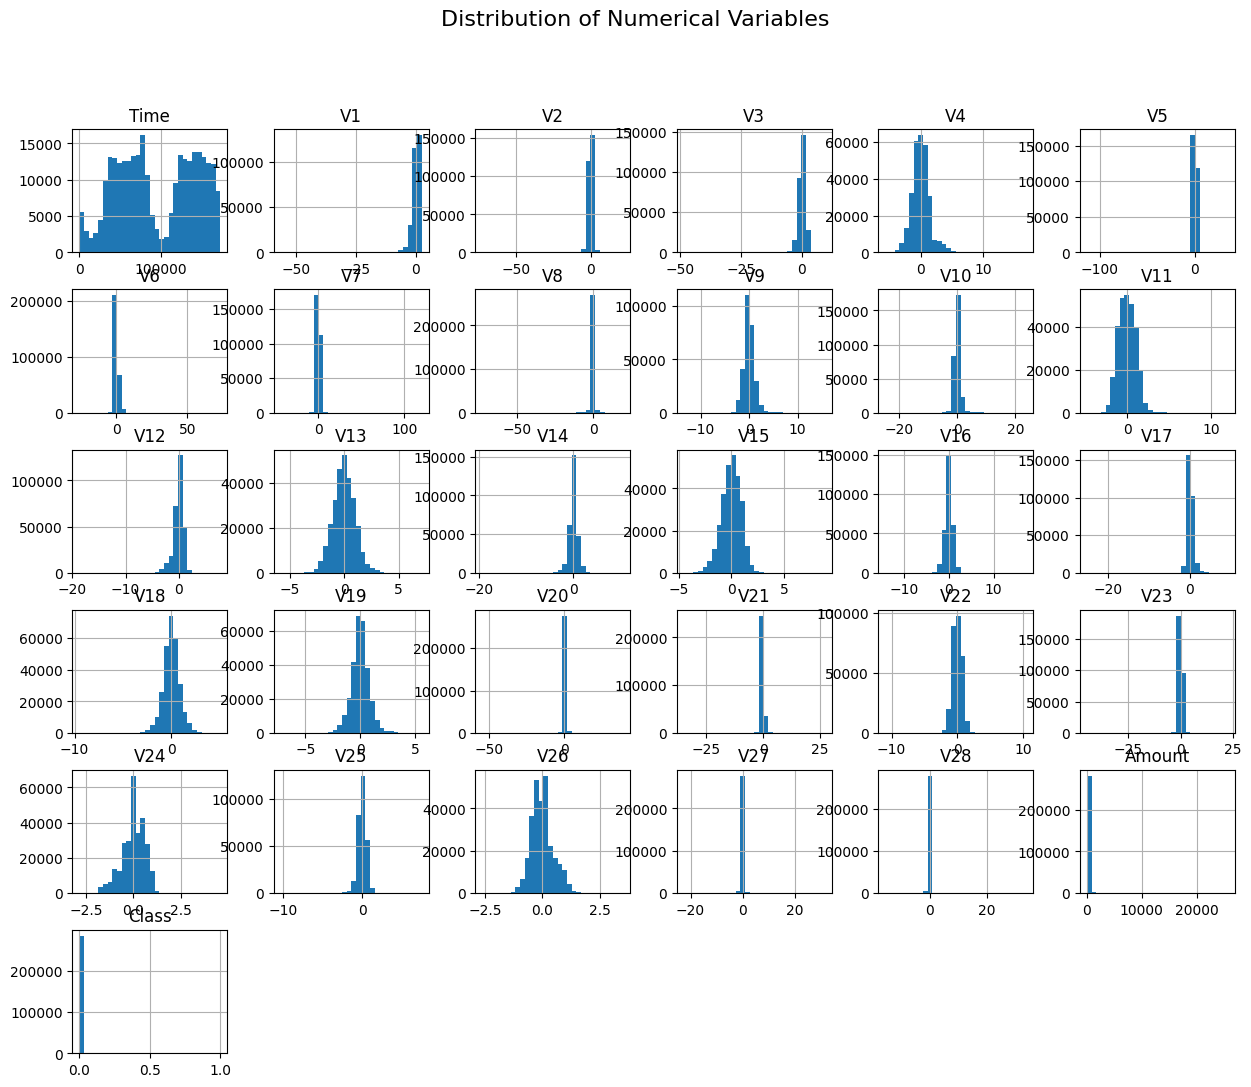

In [11]:
# Plotting histograms for all numerical variables
df.hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

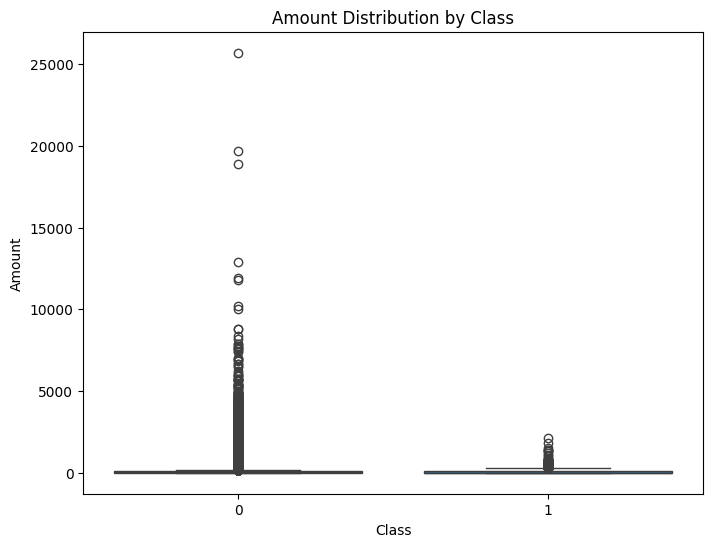

In [12]:
# Boxplot of transaction amount by class
plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Amount Distribution by Class")
plt.show()

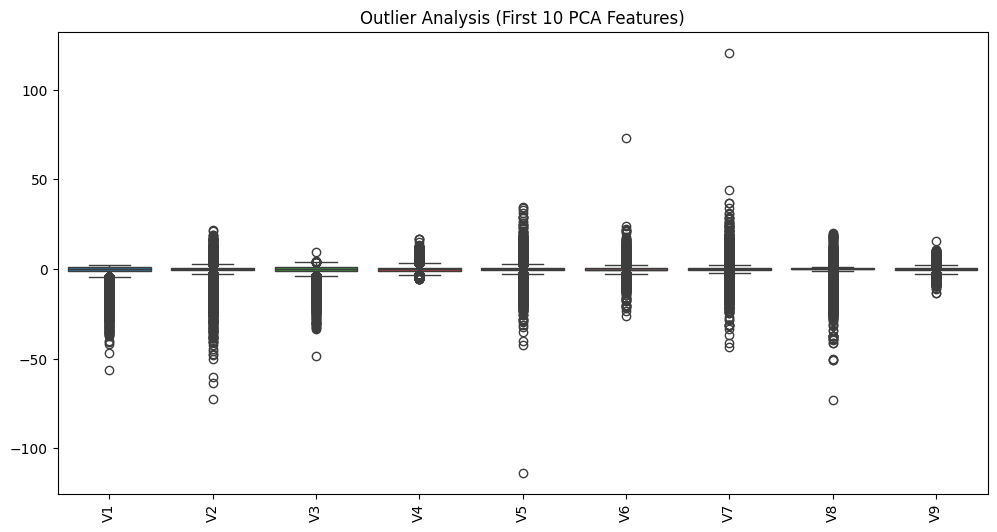

In [13]:
# Boxplot for outlier analysis of the first 10 PCA features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:10])  
plt.title("Outlier Analysis (First 10 PCA Features)")
plt.xticks(rotation=90)
plt.show()

We can see that V2 has more outliers out of this 10 features as V2 has a higher concentration of data points outside the whiskers compared to the other features.

In [14]:
from sklearn.preprocessing import StandardScaler

# Scaling the "Amount" column using StandardScaler
scaler = StandardScaler()
df["Amount_Scaled"] = scaler.fit_transform(df[["Amount"]])

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## SMOTE 
(Synthetic Minority Over-sampling Technique) is used to balance the dataset by oversampling the minority class.      
As we saw earlier that Class 0 appears more than class 1. To balance the dataset we will use SMOTE.

In [16]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

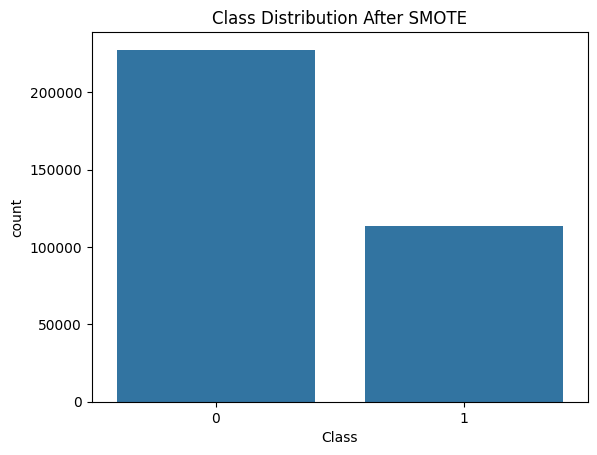

In [17]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_train_smote)
plt.title("Class Distribution After SMOTE")
plt.show()

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model (with Overfitting Prevention Settings)
rf_model = RandomForestClassifier(
    class_weight="balanced",  # Use balanced class weights
    n_estimators=50,          # Train the model with 50 trees
    max_depth=10,             # Maximum depth of trees set to 10
    min_samples_split=5,      # Minimum 5 samples required to split a node
    min_samples_leaf=5,       # Minimum 5 samples required in a leaf node
    random_state=42
)

rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5, n_estimators=50,
                       random_state=42)

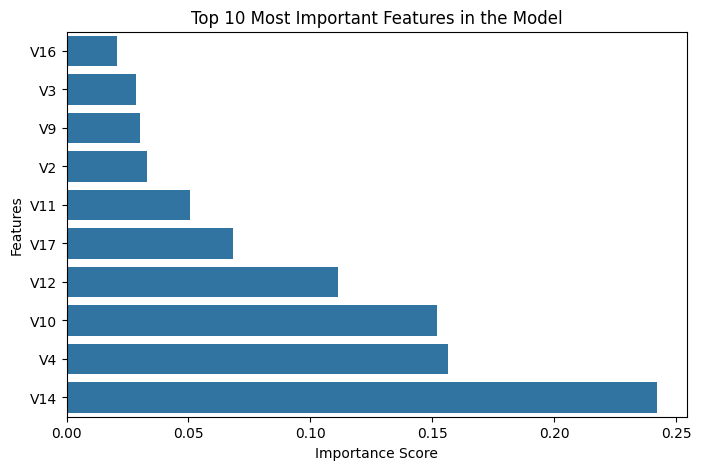

In [19]:
# Calculating Feature Importance
feature_importance = rf_model.feature_importances_
features = X_train.columns

# Sorting important features
sorted_idx = np.argsort(feature_importance)[-10:]

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Most Important Features in the Model")
plt.show()

We can see that out of all the features V14 has the more importance followed by V4, V10 and others as you can see in the chart

In [20]:
train_accuracy = rf_model.score(X_train_smote, y_train_smote)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9958
Test Accuracy: 0.9983


In [21]:
# Print the number of features used in training
print(f"The model was trained with {rf_model.n_features_in_} features.")
print(f"Number of columns in X_train_smote dataset: {X_train_smote.shape[1]}")

The model was trained with 31 features.
Number of columns in X_train_smote dataset: 31


rf_model.n_features_in_ returns the number of features the model was trained on.    
X_train_smote.shape[1] gives the number of columns (features) in the dataset after SMOTE.

In [25]:
# Getting the feature names expected by the model
feature_names = X_train_smote.columns

# Creating a new sample data dictionary
new_data_dict = {col: 0 for col in feature_names}  #  initializing all values to 0

# Defining the first test data point
new_data_dict.update({
    "V1": -1.5,
    "V2": 2.0,
    "V3": -3.0,
    "V4": 0.5,
    "V5": 1.2,
    "Amount": 500.0
})
new_data_1 = pd.DataFrame([new_data_dict])

# Define the second test data point
new_data_dict.update({
    "V1": 3.2,
    "V2": -1.4,
    "V3": 4.5,
    "V4": -2.1,
    "V5": -3.3,
    "Amount": 25000.0
})
new_data_2 = pd.DataFrame([new_data_dict])

# Combining both test data points
new_data_final = pd.concat([new_data_1, new_data_2])

This code is used to test the trained Random Forest model by creating new synthetic transactions and predicting whether they are fraudulent (1) or normal (0).      
Testing the trained Random Forest model with synthetic transactions is essential to evaluate its ability to generalize beyond the training data and accurately detect fraudulent transactions.

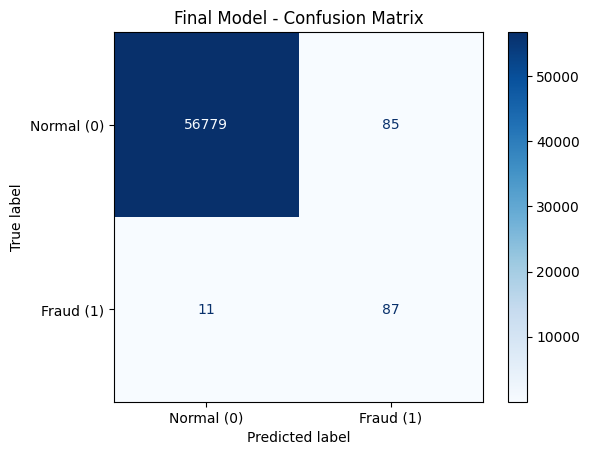

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create Confusion Matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))

# Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal (0)", "Fraud (1)"])
disp.plot(cmap='Blues')
plt.title("Final Model - Confusion Matrix")
plt.show()

## **Results and Future Improvements**

Our model was trained using **Random Forest** and **XGBoost** to detect fraud in credit card transactions.  
We addressed the **data imbalance problem** using **SMOTE**, helping the model better recognize fraudulent transactions.  
By performing a **Precision-Recall analysis**, we optimized the **threshold value**, allowing the model to detect more fraud cases effectively.  